<a href="https://colab.research.google.com/github/gkv856/KaggleData/blob/main/S1_prepare_embedding_model_AutoVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description


1.   This notebook is part1 of Auto voice cloning (AVC) project
2.   In this notebook we will use [this github repo](https://github.com/gkv856/end2end_auto_voice_conversion)
3.   First we will create mel-spectrogram from the raw audio
4.   Then we will train Embedding model using GE2E loss
5.   Then we will test the model

* [How to create embedding model using 'Generalized End-to-End Loss for Speaker Verification' 
(GE2E)](https://github.com/gkv856/KaggleData/blob/main/S1_prepare_embedding_model_AutoVC.ipynb)
* [Paper used](https://arxiv.org/abs/1710.10467)


# Installing dependencies

In [4]:
pip install webrtcvad

# Clone the git repository

In [5]:
!git clone https://github.com/gkv856/end2end_auto_voice_conversion.git

Cloning into 'end2end_auto_voice_conversion'...
remote: Enumerating objects: 449, done.
remote: Counting objects: 100% (449/449), done.
remote: Compressing objects: 100% (350/350), done.
remote: Total 449 (delta 116), reused 401 (delta 68), pack-reused 0
Receiving objects: 100% (449/449), 39.22 MiB | 30.84 MiB/s, done.
Resolving deltas: 100% (116/116), done.


# ACTION REQUIRED:
**Rename the downloaded folder from "end2end_auto_voice_conversion" to "AVC"**

# Couple of manual changes
1. Double click and open 'constants.py' file located at '/content/AVC/strings/constants.py'
2. Change line 6 from 'from utils.dict_to_dot import GetDictWithDotNotation' to: "from AVC.utils.dict_to_dot import GetDictWithDotNotation' as mentioned above, we need to this for every package not found error
3. Change line 8 to: PROJECT_NAME = "AVC"
4. Change line 10 to: current_dir = Path("/content/AVC/strings/constants.py")

In [6]:
from AVC.strings.constants import hp

Device type available = 'cuda:0'


# Create mel-spectrogram from raw data

In [7]:
from AVC.s1_data_prep.audio_to_spectrogram import CreateSpectrogram
from AVC.s2_generalized_end2end_loss_GE2E.s4_train_embed_model import TrainEmbedModel

In [8]:
# dataset1
cr_obj = CreateSpectrogram(hp)
cr_obj.save_spectrogram_tisv()

Spectrograms saved!!


In [9]:
# seconda dataset
hp.raw_audio.raw_audio_path = "/content/AVC/static/raw_data/librispeech_test-other"
# step 1 prepare the spectrogram from the raw audio file
cr_obj = CreateSpectrogram(hp)
cr_obj.save_spectrogram_tisv()

Spectrograms saved!!


# Train the Embedding model using GE2E loss

In [10]:

# step2 of the Auto voice cloning is to: train the embedding model
# to get a user's embedding or 256 dim vector representing user's speaking style

hp.m_ge2e.training_epochs = 1000
hp.m_ge2e.checkpoint_interval = 300
hp.m_ge2e.min_test_loss = 4

hp.m_ge2e.training_N = 4
hp.m_ge2e.training_M = 16

hp.m_ge2e.test_N = 4
hp.m_ge2e.test_M = 16

hp.m_ge2e.lr = 0.05
# creating training object
train_emb_model_obj = TrainEmbedModel(hp)

# training the model
model, train_loss, test_loss = train_emb_model_obj.train_model(lr_reduce=300, 
                                                               epoch_print=100, 
                                                               dot_print=10)
print(2)


Epoch:[100/1000] .......... Train_Loss:19.1470	 Test_Loss:15.0947	00:00:30
Epoch:[200/1000] .......... Train_Loss:5.4873	 Test_Loss:0.8825	00:00:29
Epoch:[300/1000] .......... Train_Loss:5.5472	 Test_Loss:2.4245	00:00:29
Reducing learning rate from 0.05 to 0.025
Model saved as 'ckpt_epoch_300_L_5.5472.pth'
Epoch:[400/1000] .......... Train_Loss:0.5086	 Test_Loss:2.2856	00:00:29
Epoch:[500/1000] .......... Train_Loss:2.8480	 Test_Loss:0.0292	00:00:30
Epoch:[600/1000] .......... Train_Loss:0.6753	 Test_Loss:0.1022	00:00:29
Reducing learning rate from 0.025 to 0.0125
Model saved as 'ckpt_epoch_600_L_0.6753.pth'
Epoch:[700/1000] .......... Train_Loss:0.1748	 Test_Loss:0.0930	00:00:29
Epoch:[800/1000] .......... Train_Loss:0.2095	 Test_Loss:0.1140	00:00:29
Epoch:[900/1000] .......... Train_Loss:1.3559	 Test_Loss:0.2486	00:00:29
Reducing learning rate from 0.0125 to 0.00625
Model saved as 'ckpt_epoch_900_L_1.3559.pth'
Epoch:[1000/1000] .......... Train_Loss:0.0390	 Test_Loss:0.0038	00:00:29


# Load pre-trained weights and test the embedding model

In [11]:
from AVC.s2_generalized_end2end_loss_GE2E.s5_eval_model import calculate_ERR, plot_scatter
from AVC.s2_generalized_end2end_loss_GE2E.s2_model_GE2E_loss_speach_embed import  get_pre_trained_embedding_model

In [13]:
# loading a pre-trained model
hp.m_ge2e.best_model_path = "/content/AVC/static/model_chk_pts/ge2e/m_best_1000_L_0.0038.pth"
model = get_pre_trained_embedding_model(hp)

Pre-trained model loaded /content/AVC/static/model_chk_pts/ge2e/m_best_1000_L_0.0038.pth


In [ ]:
#calculating ERR
# calculate_ERR(model, hp, 4, 8)

In [14]:
def plot_scatter_with_diff_spr_nums(model):
  print("\n\nUsing '4' speakers")
  num_speakers = 4
  num_utter = 16
  # plotting speaker embeddings
  plot_scatter(model, hp, num_speakers, num_utter)

  print("\n\nUsing '6' speakers")
  num_speakers = 6
  num_utter = 32
  plot_scatter(model, hp, num_speakers, num_utter)

  print("\n\nUsing '10' speakers")
  num_speakers = 10
  num_utter = 32
  plot_scatter(model, hp, num_speakers, num_utter)
    



Using '4' speakers


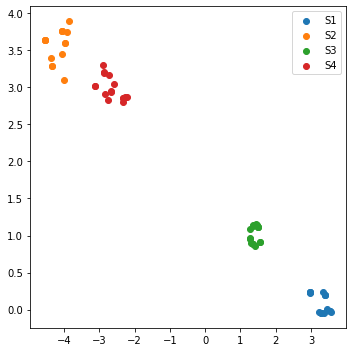

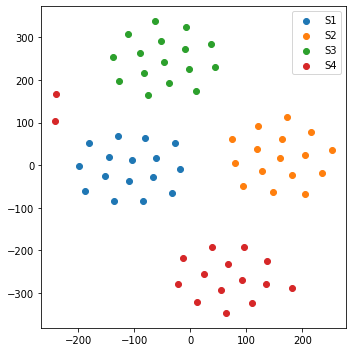

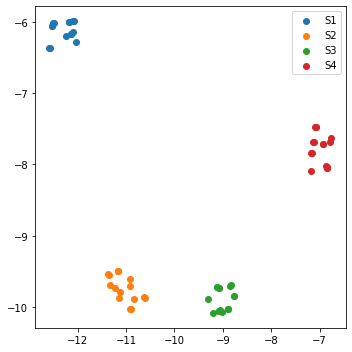



Using '6' speakers


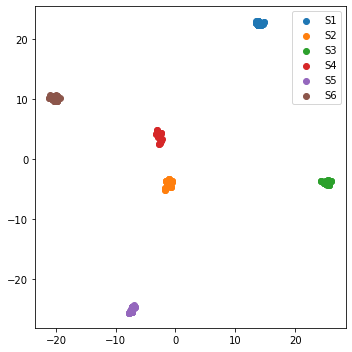

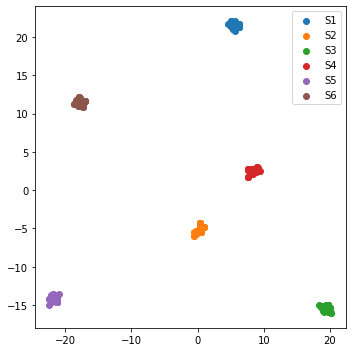



Using '10' speakers


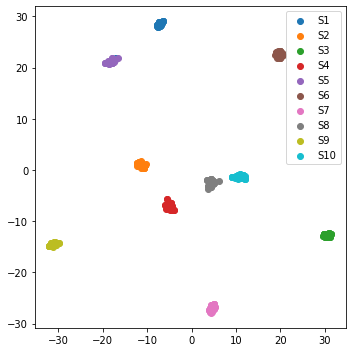

In [15]:
plot_scatter_with_diff_spr_nums(model)

# Embedding model test with Final Epoch weights

Pre-trained model loaded /content/AVC/static/model_chk_pts/ge2e/final_epoch_1000_L_0.0390.pth


Using '4' speakers


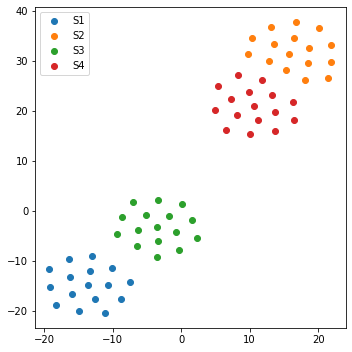

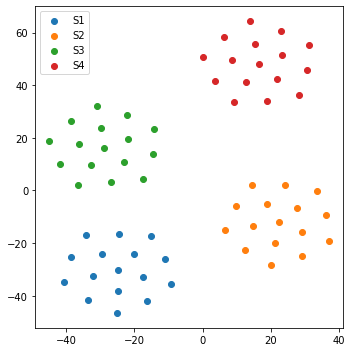

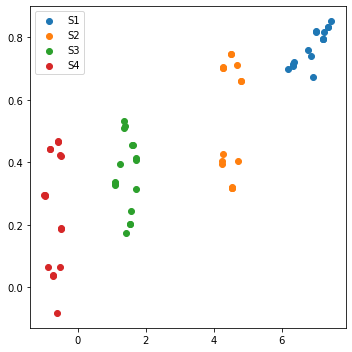



Using '6' speakers


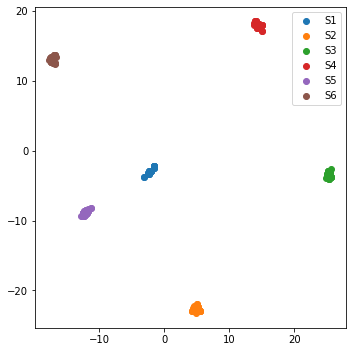

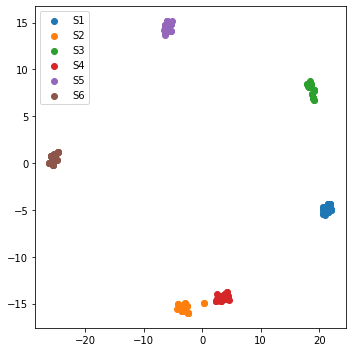



Using '10' speakers


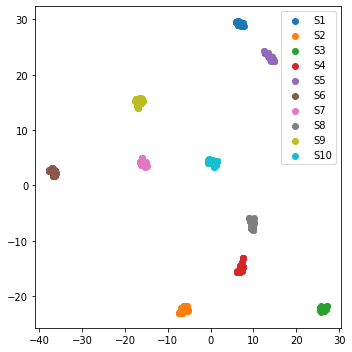

In [17]:
# loading a pre-trained model
hp.m_ge2e.best_model_path = "/content/AVC/static/model_chk_pts/ge2e/final_epoch_1000_L_0.0390.pth"
final_model = get_pre_trained_embedding_model(hp)
plot_scatter_with_diff_spr_nums(final_model)